In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("election_results_2024 (1).csv")

In [6]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [5]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


#  Party with highest and lowest margin victory

In [8]:
party_votes = df.groupby("Leading Party")['Margin'].sum().sort_values(ascending=False)
df["Margin"] = pd.to_numeric(df["Margin"], errors="coerce")

In [9]:
highest_margin = df.loc[df["Margin"].idxmax()]
lowest_margin = df.loc[df["Margin"].idxmin()]

#  No. of seats win by each party

In [10]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowerst_votes = party_votes.idxmax()

# No. of seats won by each party

In [11]:
seats_won = df["Leading Party"].value_counts()

In [19]:
seats_won

,count
Leading Party,
Bharatiya Janata Party,240
Indian National Congress,99
Samajwadi Party,37
All India Trinamool Congress,29
Dravida Munnetra Kazhagam,22
Telugu Desam,16
Janata Dal (United),12
Shiv Sena (Uddhav Balasaheb Thackrey),9
Nationalist Congress Party – Sharadchandra Pawar,8


<ipython-input-18-8ab57cc040f5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette="viridis")


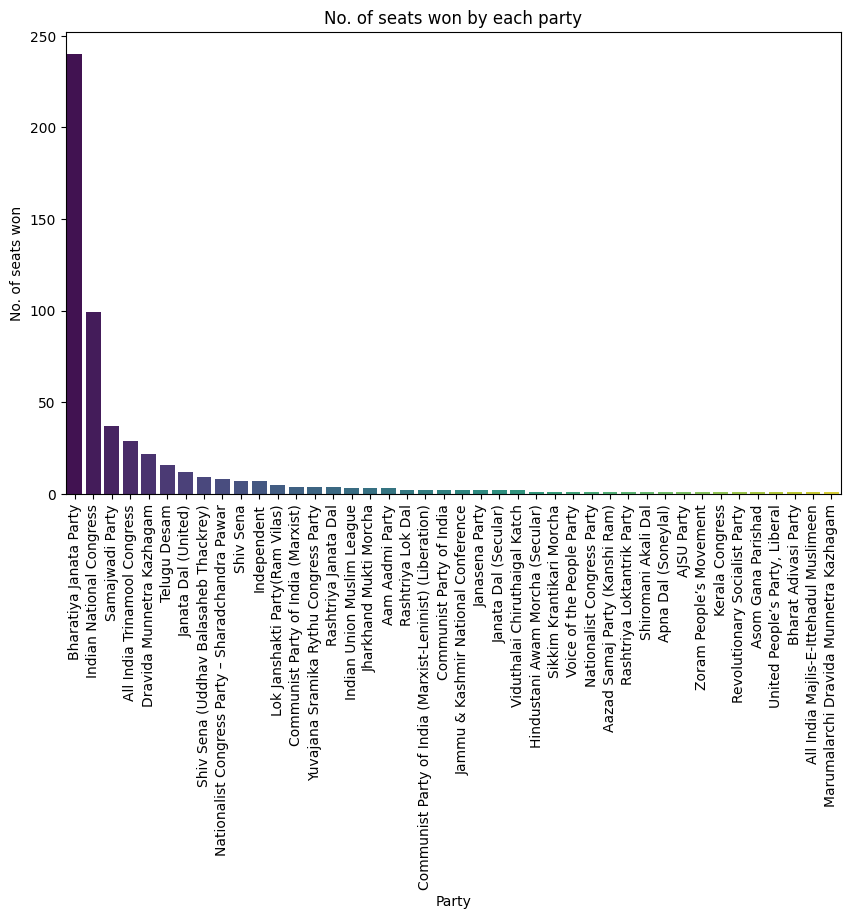

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=seats_won.index, y=seats_won.values, palette="viridis")
plt.title("No. of seats won by each party")
plt.xlabel("Party")
plt.ylabel("No. of seats won")
plt.xticks(rotation=90)
plt.show()

#  Get the votes for Rahul Gandhi , Narendra modi , Amit shah

In [20]:
rahul_entries = df[df['Leading Candidate']== "RAHUL GANDHI"]
modi_entries = df[df['Leading Candidate']== "NARENDRA MODI"]
amit_entries = df[df['Leading Candidate']== "AMIT SHAH"]


In [24]:
rahul_votes = rahul_entries["Margin"].values
modi_votes = modi_entries["Margin"].values[0]  if not modi_entries.empty else 0
amit_votes = amit_entries["Margin"].values[0]  if not amit_entries.empty else 0


In [27]:
rahul_constituency = list(rahul_entries["Constituency"])
modi_constituency = list(modi_entries["Constituency"])    if not modi_entries.empty else "M0"
amit_constituency = list(amit_entries["Constituency"])    if not amit_entries.empty else "AM"

In [30]:
# Ensure that all lists are of the same length
# If you want to create entries for "Narendra Modi" and "Amit Shah" for each constituency, adjust accordingly

df_to_plot = pd.DataFrame({
    'Condidate': ["Rahul Gandhi"]*len(rahul_votes) + ["Narendra Modi"]*len(modi_constituency) + ["Amit Shah"]*len(amit_constituency),
    'Consituency': rahul_constituency + modi_constituency + amit_constituency,
    'Votes': list(rahul_votes) + [modi_votes] + [amit_votes]
})

# If modi_votes and amit_votes are single values and should correspond to multiple constituencies:
df_to_plot = pd.DataFrame({
     'Condidate': ["Rahul Gandhi"]*len(rahul_votes) + ["Narendra Modi"]*len(modi_constituency) + ["Amit Shah"]*len(amit_constituency),
     'Consituency': rahul_constituency + modi_constituency + amit_constituency,
     'Votes': list(rahul_votes) + [modi_votes] * len(modi_constituency) + [amit_votes] * len(amit_constituency)
 })


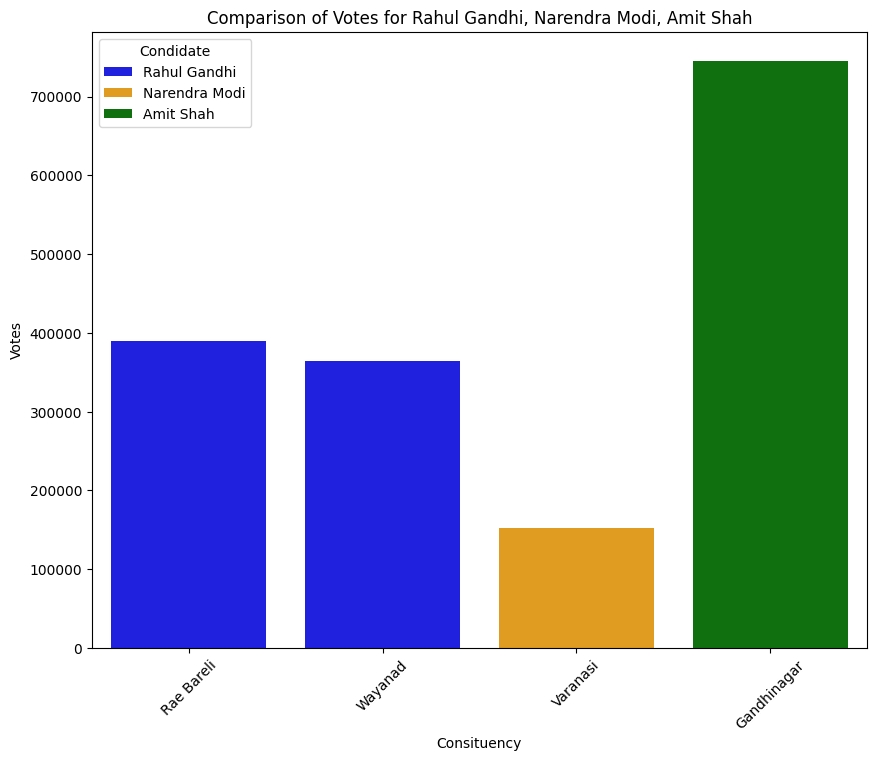

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
custom_palette = {
    "Rahul Gandhi": "blue",
    "Narendra Modi": "orange",
    "Amit Shah": "green"
}

plt.figure(figsize=(10,8))
sns.barplot(data=df_to_plot, x="Consituency", y="Votes", hue="Condidate", palette=custom_palette)
plt.title("Comparison of Votes for Rahul Gandhi, Narendra Modi, Amit Shah")
plt.xlabel("Consituency")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()


#  Highest and lowest victory of condidate

In [38]:
highest_margin_entry = df.loc[df["Margin"].idxmax()]
lowest_margin_entry= df.loc[df["Margin"].idxmin()]

In [42]:
import pandas as pd

# Find the highest and lowest victory margin for each candidate
highest_victory = df_to_plot.loc[df_to_plot.groupby('Condidate')['Votes'].idxmax()].reset_index(drop=True)
lowest_victory = df_to_plot.loc[df_to_plot.groupby('Condidate')['Votes'].idxmin()].reset_index(drop=True)

# Display the results
print("Highest Victory Margin for Each Candidate:")
print(highest_victory)

print("\nLowest Victory Margin for Each Candidate:")
print(lowest_victory)


Highest Victory Margin for Each Candidate:
       Condidate  Consituency     Votes
0      Amit Shah  Gandhinagar  744716.0
1  Narendra Modi     Varanasi  152513.0
2   Rahul Gandhi   Rae Bareli  390030.0

Lowest Victory Margin for Each Candidate:
       Condidate  Consituency     Votes
0      Amit Shah  Gandhinagar  744716.0
1  Narendra Modi     Varanasi  152513.0
2   Rahul Gandhi      Wayanad  364422.0


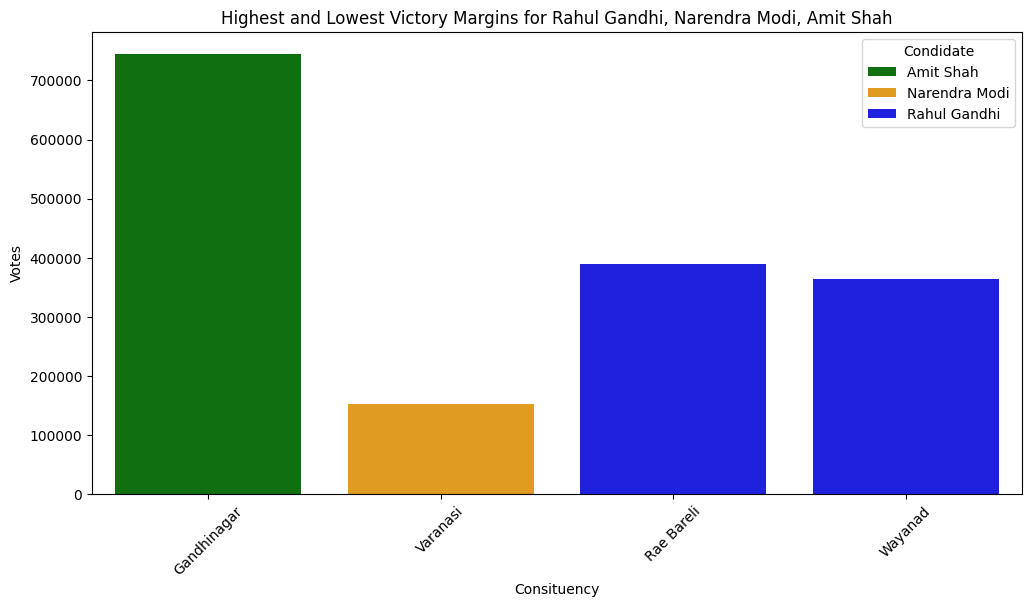

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine highest and lowest victory data for visualization
victory_df = pd.concat([highest_victory, lowest_victory], ignore_index=True)

# Set a custom color palette for the plot
custom_palette = {
    "Rahul Gandhi": "blue",
    "Narendra Modi": "orange",
    "Amit Shah": "green"
}

plt.figure(figsize=(12,6))
sns.barplot(data=victory_df, x="Consituency", y="Votes", hue="Condidate", palette=custom_palette)
plt.title("Highest and Lowest Victory Margins for Rahul Gandhi, Narendra Modi, Amit Shah")
plt.xlabel("Consituency")
plt.ylabel("Votes")
plt.xticks(rotation=45)
plt.show()


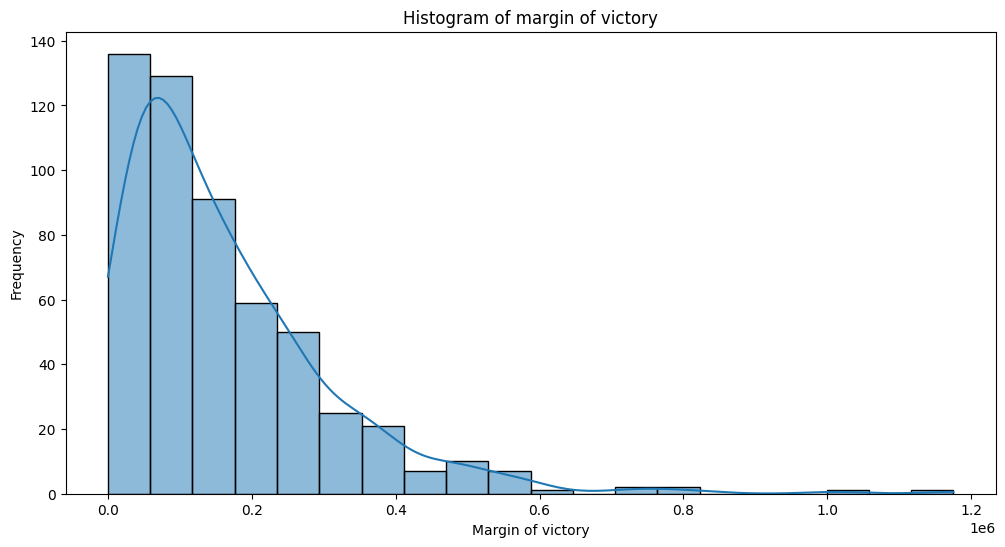

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df["Margin"], bins=20,kde=True)
plt.title("Histogram of margin of victory")
plt.xlabel("Margin of victory")
plt.ylabel("Frequency")
plt.show()


#  Votes Distribution by party

In [45]:
party_votes = df.groupby("Leading Party")['Margin'].sum().sort_values(ascending=False)

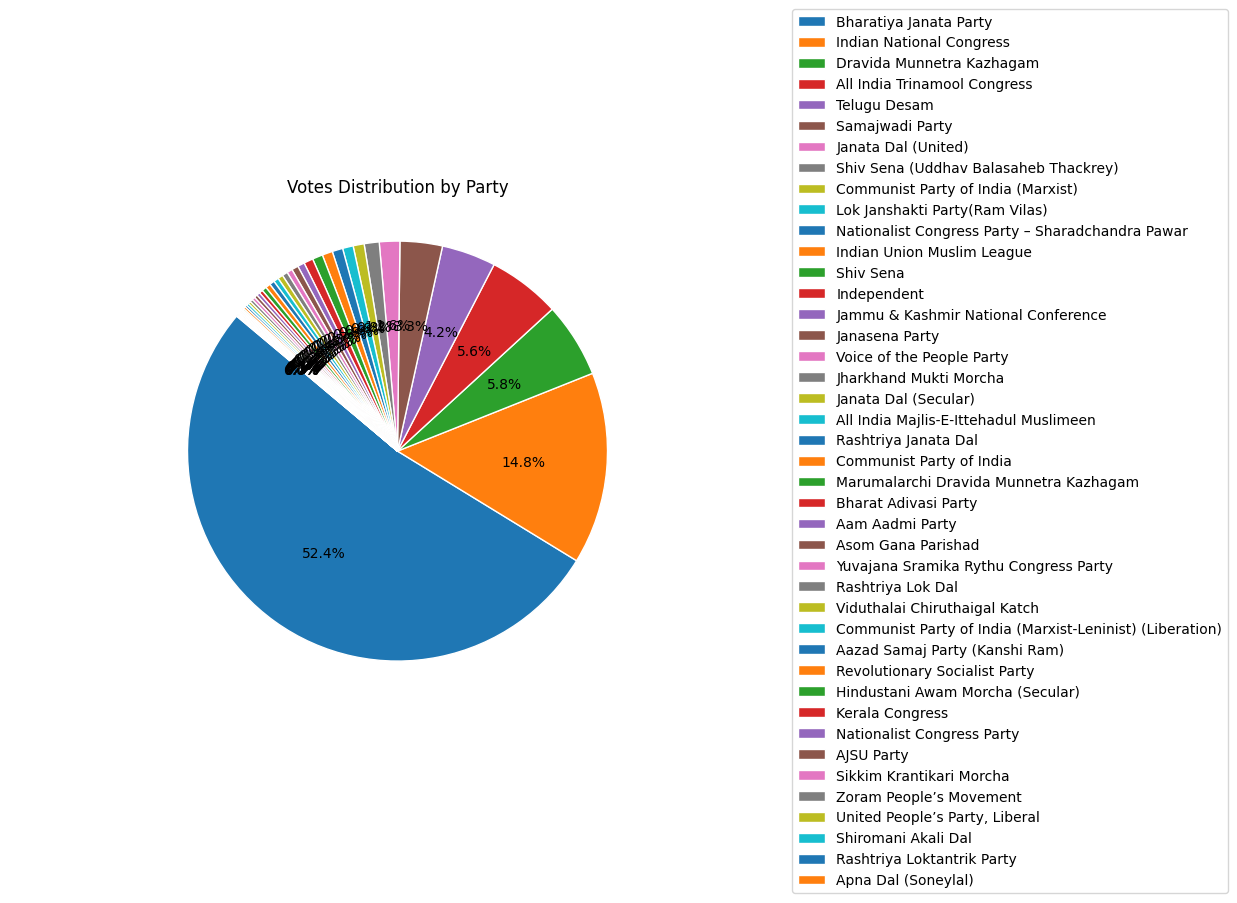

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Corrected `wedgeprops` to use a valid edgecolor
wedges, texts, autotexts = plt.pie(
    party_votes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(edgecolor="w")  # 'w' is shorthand for white color
)

plt.title("Votes Distribution by Party", pad=20)
plt.axis("equal")

# Corrected `FontSize` to `fontsize`
plt.legend(
    labels=party_votes.index,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize="medium"  # Corrected "mrdium" to "medium"
)

plt.show()


# Plot  Top 10  votes disttribution by trailing party

In [54]:
trailing_party_votes = df.groupby("Trailing Party")['Margin'].sum().sort_values(ascending=False)

In [53]:
trailing_party_seats = df["Trailing Party"].value_counts()

<ipython-input-61-6afc21ab4904>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index, y=trailing_party_votes.values, palette="viridis")


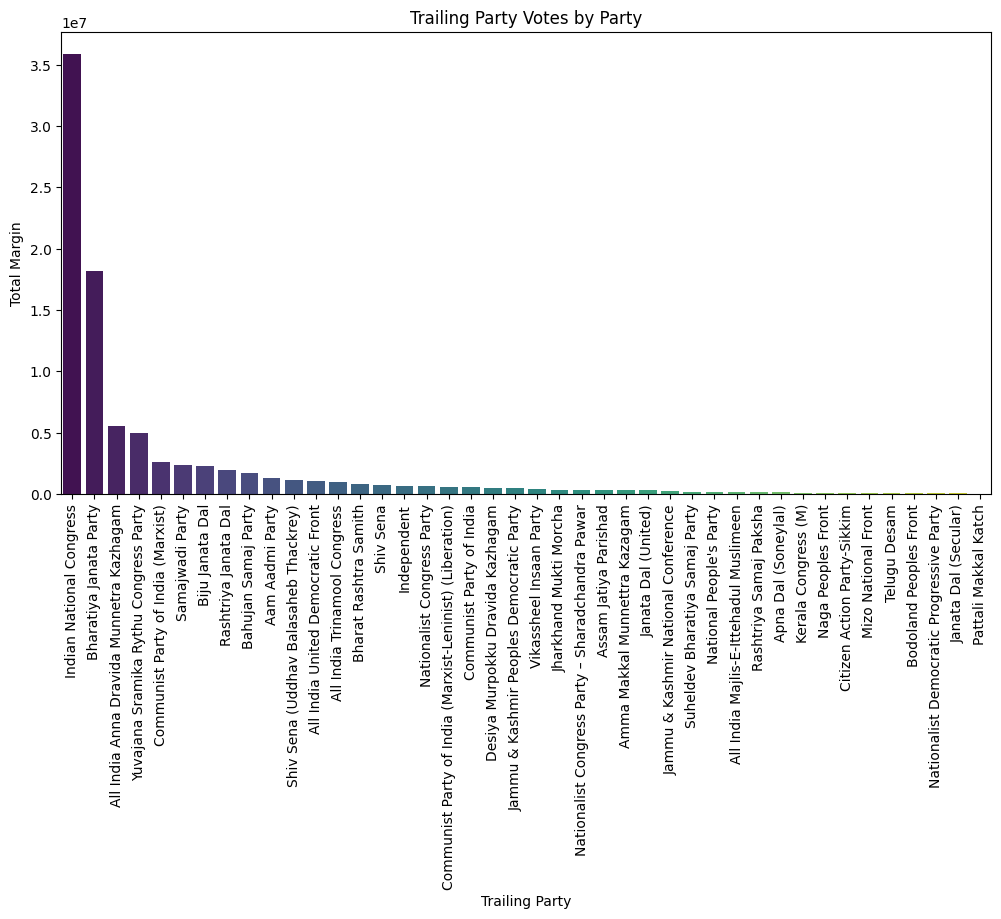

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the trailing party votes and sort them
trailing_party_votes = df.groupby("Trailing Party")['Margin'].sum().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=trailing_party_votes.index, y=trailing_party_votes.values, palette="viridis")
plt.title("Trailing Party Votes by Party")
plt.xlabel("Trailing Party")
plt.ylabel("Total Margin")
plt.xticks(rotation=90)

plt.show()


#  Top 10 trailing party

<ipython-input-60-83dbe92b2f46>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette="viridis")


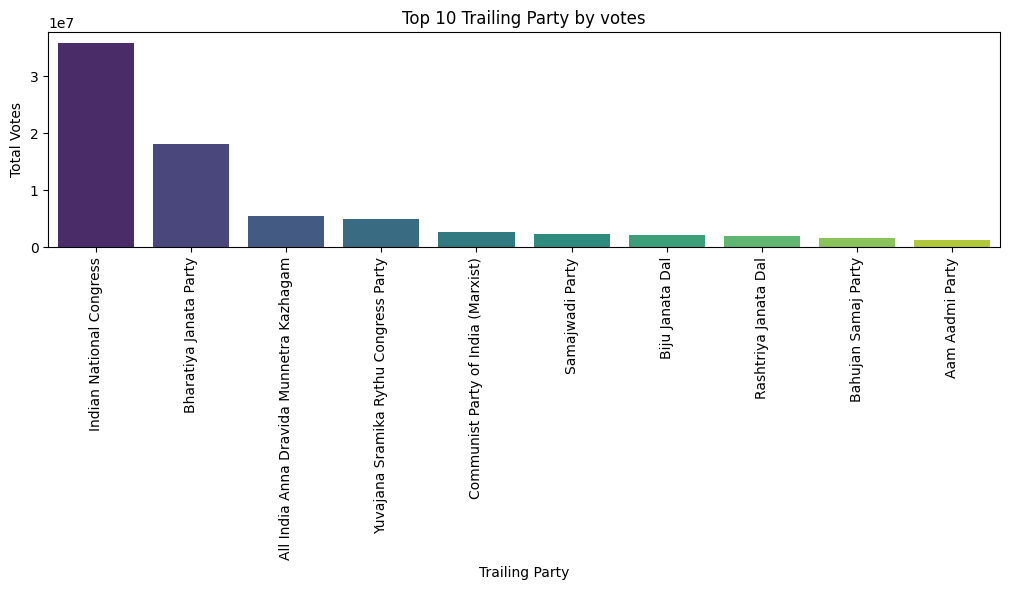

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total votes and seats for each trailing party
trailing_party_votes = df.groupby("Trailing Party")['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = df["Trailing Party"].value_counts()

# Create a figure with two subplots
plt.figure(figsize=(20, 6))

# Plot for trailing party votes
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette="viridis")
plt.title("Top 10 Trailing Party by votes")
plt.xlabel("Trailing Party")
plt.ylabel("Total Votes")
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()


#  Top 10 trailing party  by seat

<ipython-input-69-3e6269001935>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_trailing_party_seats.index, y=top_10_trailing_party_seats.values, palette="viridis")


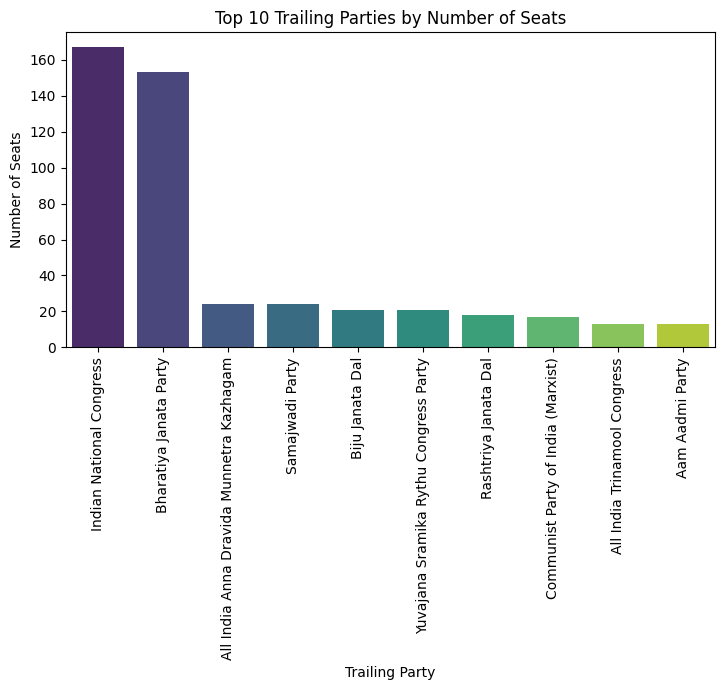

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure to take the top 10 trailing parties by seats
top_10_trailing_party_seats = trailing_party_seats.head(10)

# Create a figure with two subplots (assuming the other plot is already created)
plt.figure(figsize=(14, 7))

# Plot for top 10 trailing parties by seats
plt.subplot(1, 2, 2)
sns.barplot(x=top_10_trailing_party_seats.index, y=top_10_trailing_party_seats.values, palette="viridis")
plt.title("Top 10 Trailing Parties by Number of Seats")
plt.xlabel("Trailing Party")
plt.ylabel("Number of Seats")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
